# Introduction to signal-type classes

In the dreye package, there are various signal-type classes that handle arrays, keeps track of units, allows for quick visualization, and perform some useful calculations on the arrays. 

Please refer to the API reference for more details on particular attributes and methods. 

In [1]:
import numpy as np

from dreye import (
    # domain class
    Domain,
    # signal-type classes with similar functionalities
    Signal, Signals, DomainSignal, 
    Spectrum, Spectra, DomainSpectrum, 
    IntensitySpectrum, IntensitySpectra, IntensityDomainSpectrum, 
    # container classes for the signal-type classes above
    SignalsContainer, DomainSignalContainer,
    # signal-type classes for holding spectral 
    # distributions of light that were measured
    CalibrationSpectrum, MeasuredSpectrum, MeasuredSpectraContainer,
    # signal-type class for holding a set of spectral sensitivities
    Sensitivity
)

## Introduction to Domains

A `dreye.Domain` object contains an array of a range of values in descending or ascending order. It also has units associated with it. It can be initialized in multiple ways:

In [2]:
domain1 = Domain(1, 4, 0.1, units='s')
domain2 = Domain(np.linspace(0, 5, 11), units='s')
domain3 = Domain(np.linspace(0, 10, 11), units='V')
domain4 = Domain(np.linspace(10, 20, 11), units='V')
domain5 = Domain(np.array([0, 1, 2.1]), units='s')
domain6 = Domain(-1, -4, 0.1, units='s')

In the first and last example the `dreye.Domain` instance was initialized using a start and end value and a desired interval. For the other two examples , we used a `numpy.ndarray` to initialize the `dreye.Domain` instance. 

In [3]:
print(domain1)
print(domain2)
print(domain3)
print(domain4)
print(domain5)
print(domain6)

Domain(start=1.0, end=4.0, interval=0.1, units=second)
Domain(start=0.0, end=5.0, interval=0.5, units=second)
Domain(start=0.0, end=10.0, interval=1.0, units=volt)
Domain(start=10.0, end=20.0, interval=1.0, units=volt)
Domain(start=0.0, end=2.1, interval=[1.  1.1], units=second)
Domain(start=-1.0, end=-4.0, interval=-0.1, units=second)


Each `dreye.Domain` instance has a start and end value and an interval corresponding the step size or a list of intervals if the interval are non-uniform. Furthermore, each instance has units associated with it, which limit the type of mathematical operations that can be performed on the array. The actual `numpy.ndarray` objects of each domain are stored, as well as the unit containing `pint.Quantity`:

In [4]:
# numpy.ndarray
print(domain1.magnitude)
# pint.Quantity
print(domain1.values)
# pint.Unit
print(domain1.units)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4. ]
[1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7000000000000002 1.8 1.9 2.0 2.1 2.2 2.3 2.4000000000000004 2.5 2.6 2.7 2.8 2.9000000000000004 3.0 3.1 3.2 3.3000000000000003 3.4000000000000004 3.5 3.6 3.7 3.8000000000000003 3.9000000000000004 4.0] second
second


Simple mathematical operations can be performed, if the units and arrays allow it. Units are converted appropriately according to `pint`'s methods of unit conversion:

In [5]:
print(domain3 + domain4)
print(domain2 * domain3)

Domain(start=10.0, end=30.0, interval=2.0, units=volt)
Domain(start=0.0, end=50.0, interval=[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5], units=second * volt)


The domain object also has various other attributes that may be helpful:

In [6]:
print(domain1.span)  # span of domain
print(domain1.boundaries)  # tuple of start and end
print(domain1.start)
print(domain1.end)
print(domain1.interval)

3.0
(1.0, 4.0)
1.0
4.0
0.1


You can also convert units of a domain using the `to` method:

In [7]:
print(domain1.to('ms'))

Domain(start=1000.0, end=4000.0, interval=100.0, units=millisecond)


## Signal-type classes

A signal-type class contains some arbitary array that corresponds to a signal, and it contains the domain associated with this signal. All signal classes also manage the units of the domain and the signal, and unit conversion is possible as with the `dreye.Domain` class. Simple mathematical operations are also supported with some more advanced support for performing mathematical operations on multiple signal-type classes.

The simplest form of signal-type class is the `dreye.Signal` class, which accepts a one-dimensional array for the signal and a domain. Specific units can also be passed as well as a name for the Signal:

In [8]:
signal = Signal(
    np.arange(101) + np.random.normal(0, 10, 101),  # the signal
    np.linspace(0, 1, 101),  # the domain
    units='V', 
    domain_units='s', 
    name='some_volt_signal'
)

In [17]:
print(signal.domain)

Domain(start=0.0, end=1.0, interval=0.01, units=second)


The signal can be visualized with the `plot` method:

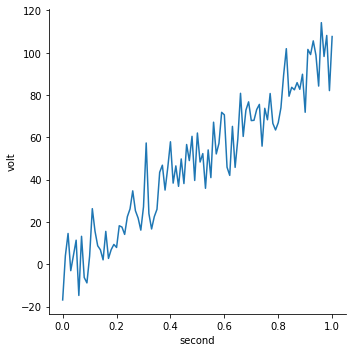

In [9]:
g = signal.plot()

The signal can also be smoothed (using a savgol filter):

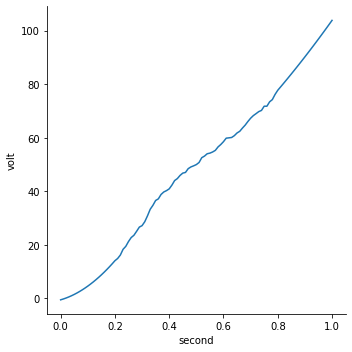

In [10]:
g = signal.smooth(
    0.4 # smoothing window in units of the domain
).plot()

You can also plot various smoothing windows on top of each other:

/Users/matthias.christenson/Documents/dreye/dreye/core/signal.py:830: RuntimeWarning: Chosen domain interval must be rounded down for filtering
  RuntimeWarning


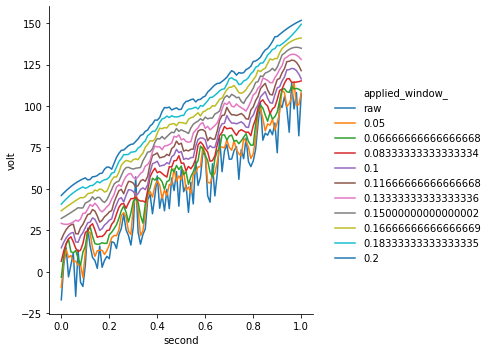

In [13]:
g = signal.plotsmooth(
    0.05,  # minimum smoothing window 
    0.2,  # maximum smoothing window
    steps=,  # number of smoothing windows to test
    offset=5  # offset of each smoothed signal for better visualization
)

Let's create another `Signal` instance, but with a slightly different domain range and interval.

Domain(start=0.1, end=0.9, interval=0.005, units=second)


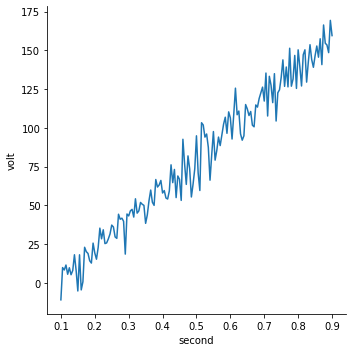

In [19]:
# Another signal instance
signal2 = Signal(
    np.arange(161) + np.random.normal(0, 10, 161),  # the signal
    np.linspace(0.1, 0.9, 161),  # the domain
    units='V', 
    domain_units='s', 
    name='other_volt_signal'
)
print(signal2.domain)
g = signal2.plot()

Mathematical operations between `signal` and `signal2` are possible, because their domains overlap. Before performing the mathematical operations the domains of boths signals are equalized by finding their "common denominator". This means that the equalized signals will have domains that range from 0.1 to 0.8 with an interval of 0.01.

Domain(start=0.1, end=0.9, interval=0.01, units=second)


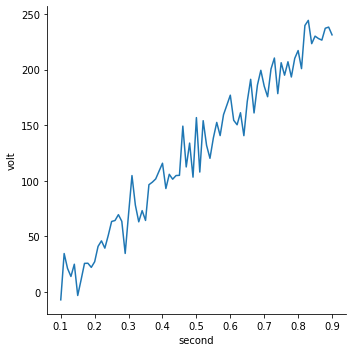

In [22]:
signal3 = signal + signal2
print(signal3.domain)
signal3.plot()

Domain(start=0.1, end=0.9, interval=0.01, units=second)


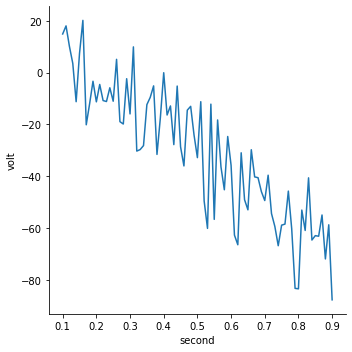

In [23]:
signal3 = signal - signal2
print(signal3.domain)
signal3.plot()

Domain(start=0.1, end=0.9, interval=0.01, units=second)


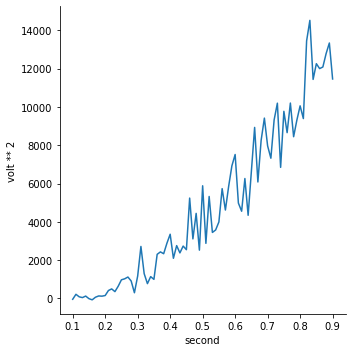

In [24]:
signal3 = signal * signal2
# notice that by multiplying the units of signal3 are volt^2
print(signal3.domain)
signal3.plot()

Signal-type classes also have various useful attributes:

In [34]:
print(signal.span)  # max - min of signal
print(signal.boundaries)
print(signal.integral)  # integral of signal
print(signal.normalized_signal)  # signal / signal_integral
print(signal.max_normalized)  # signal / signal.max
print(signal.gradient)  # gradient of signal

131.04370592289894
(-16.86344736725926, 114.18025855563968)
48.33540327045998 second * volt
Signal(
	 name=some_volt_signal, 
	 units=1 / second, 
	 domain=Domain(start=0.0, end=1.0, interval=0.01, units=second) 
 )
Signal(
	 name=some_volt_signal, 
	 units=dimensionless, 
	 domain=Domain(start=0.0, end=1.0, interval=0.01, units=second) 
 )
Signal(
	 name=some_volt_signal, 
	 units=volt / second, 
	 domain=Domain(start=0.0, end=1.0, interval=0.01, units=second) 
 )


You can also use various methods that are also implemented for `numpy.ndarray` objects, except that units are tracked:

In [39]:
print(signal.max())
print(signal.nanmax())
print(signal.mean())
print(signal.var())
print(signal.corrcoef())

114.18025855563968 volt
114.18025855563968 volt
48.306120032853464 volt
1027.7350840739196 volt ** 2
1.0 dimensionless


You can access the `numpy.ndarray` with the `magnitude` attribute and the `pint.Quantity` with the `values` attribute:

In [41]:
print(signal.magnitude)
print(signal.values)

[-16.86344737   3.9872356   14.54401707  -3.03030989   4.21394123
  11.36760977 -14.74276714  13.20262583  -6.26666968  -8.81511416
   3.88260295  26.27586133  15.62849231   8.72657969   6.83682384
   2.07971668  15.53732708   2.75912473   6.89284067   9.37174641
   7.93344172  18.20154733  17.57807516  14.10880534  22.46764686
  26.17102139  34.68865735  25.29298897  21.83903652  16.12871804
  27.16832722  57.30987525  23.90550527  16.67822083  22.48951117
  25.97830492  43.46002936  46.81209114  35.05795844  45.65134971
  57.88359933  38.33990069  46.48219092  36.82110283  49.76648791
  38.13559408  56.58902626  48.98634846  60.45652454  39.60675403
  62.0279417   48.31948488  52.29686331  35.89248573  54.02987772
  40.94077324  67.13301967  52.13829836  57.13960231  71.79354873
  70.62564965  45.86876864  41.99648626  65.15685669  45.78359355
  59.23185164  80.78295721  60.4136956   72.81533096  76.74841856
  67.89317976  68.03331658  73.10497065  75.55108551  55.81491343
  73.69479

If you want all the information associated to your singal instance as a long-format `pandas.DataFrame` object, you can use the `to_longframe` method:

In [46]:
signal.to_longframe().head()

,domain,signal_min,signal_max,values,name,units,units_dimensionality,domain_units,domain_units_dimensionality,domain_min,domain_max,applied_window_
0,0.00,NaN,NaN,-16.863447,some_volt_signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,raw
1,0.01,NaN,NaN,3.987236,some_volt_signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,raw
2,0.02,NaN,NaN,14.544017,some_volt_signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,raw
3,0.03,NaN,NaN,-3.030310,some_volt_signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,raw
4,0.04,NaN,NaN,4.213941,some_volt_signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,raw


## Two-dimensional signal-type classes

It is also possible to have two-dimensional signal instances using the `Signals` or `DomainSignal`. 

For the `Signals` class, the other axis that does not correspond to the domain axis refers to a separate signals, called labels. In the `DomainSignal` class, the other axis is also called labels, but is itself a domain instance; the two-dimensional object refers to a single two-dimensional signal.

The other methods introduced for the one-dimensional class also apply for the two-dimensional case. 

<class 'dreye.core.signal.Signals'>
<class 'pandas.core.indexes.base.Index'>
<class 'dreye.core.domain.Domain'>


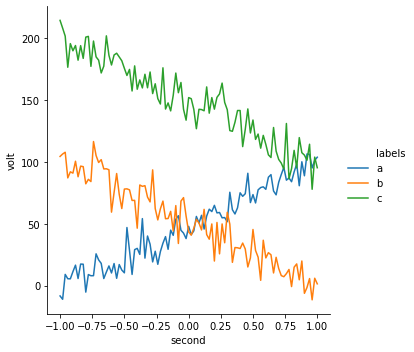

In [59]:
signals = Signals(
    np.linspace(
        np.array([0, 100, 200]), np.array([100, 0, 100]), 101
    ) + np.random.normal(0, 10, (101, 3)),  # the signal
    np.linspace(-1, 1, 101),  # the domain
    ['a', 'b', 'c'], # labels
    units='V', 
    domain_units='s', 
    domain_axis=0, 
    name='volt_signals'
)
print(type(signals))
print(type(signals.labels))  # this is a pandas.Index object
print(type(signals.domain))
signals.plot()

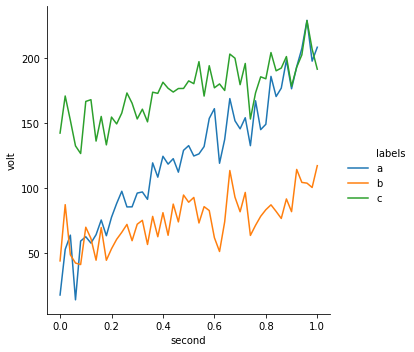

In [55]:
# arithmetical operations work with Signal and Signals classes
# signals are interpolated prior to applying the mathematical operation
(signal + signals).plot()

Next, let's do an example with the `DomainSignal` class. First, we construct to instances that have slightly different ranges for the domain and the labels:

In [62]:
domainsignal1 = DomainSignal(
    np.linspace(
        np.array([0, 100, 200]), np.array([100, 0, 100]), 101
    ) + np.random.normal(0, 10, (101, 3)),  # the signal
    np.linspace(-1, 1, 101),  # the domain
    np.linspace(0, 3, 3), # labels
    units='V', 
    domain_units='s', 
    labels_units='m', 
    domain_axis=0, 
)

domainsignal2 = DomainSignal(
    np.linspace(
        np.array([0, 100, 200]), np.array([100, 0, 100]), 101
    ) + np.random.normal(0, 10, (101, 3)),  # the signal
    np.linspace(-2, 2, 101),  # the domain
    np.linspace(0.5, 2.5, 3), # labels
    units='V', 
    domain_units='s', 
    labels_units='m', 
    domain_axis=0, 
)
print(type(domainsignal1))
print(type(domainsignal1.labels))  # this is domain instance
print(type(domainsignal1.domain))
print(domainsignal1.labels)

<class 'dreye.core.signal.DomainSignal'>
<class 'dreye.core.domain.Domain'>
<class 'dreye.core.domain.Domain'>
Domain(start=0.0, end=3.0, interval=1.5, units=meter)


`domainsignal1` and `domainsignal2` share similar domain and labels, that are interpolated upon performing mathematical operations:

Domain(start=0.5, end=2.5, interval=2.0, units=meter)
Domain(start=-1.0, end=1.0, interval=0.04, units=second)


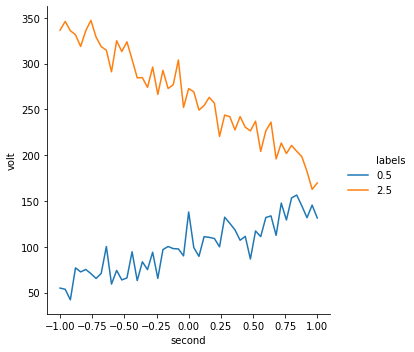

In [65]:
ds3 = domainsignal1 + domainsignal2
print(ds3.labels)
print(ds3.domain)
ds3.plot()

If you want to switch the assignment of the labels and domain in the `DomainSignal` instance you can use the switch property

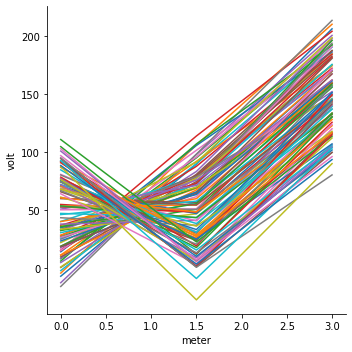

In [70]:
domainsignal1.switch.plot(legend=False)

Three-dimensional or heatmap plotting for `DomainSignal` instance will be implemented in the future.

## Combining multiple signal-type classes

Sometimes, it may be desired to group multiple signal classes together, and possible visualize them within one plot. To do this, you can use the `SignalsContainer` and `DomainSignalContainer` class:

In [71]:
container = SignalsContainer(
    [signals, signal, domainsignal1]
)

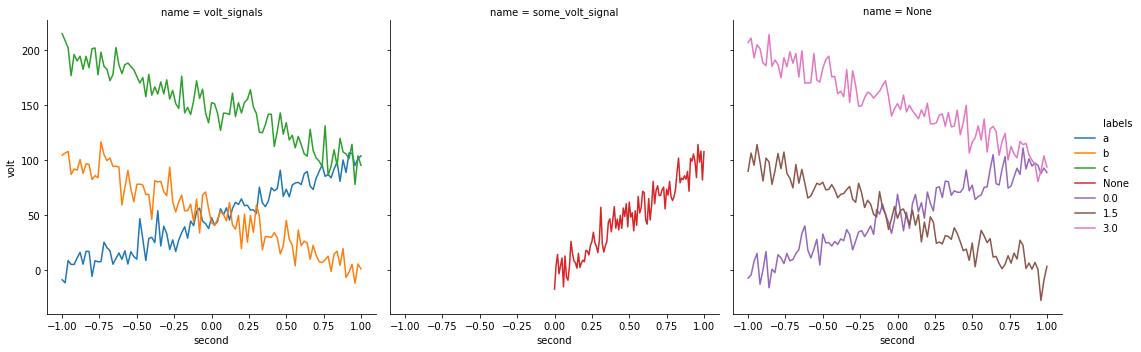

In [72]:
container.plot()

NB: plotting parameters are passed to the `seaborn.relplot` function so can be changed for plots as well. 

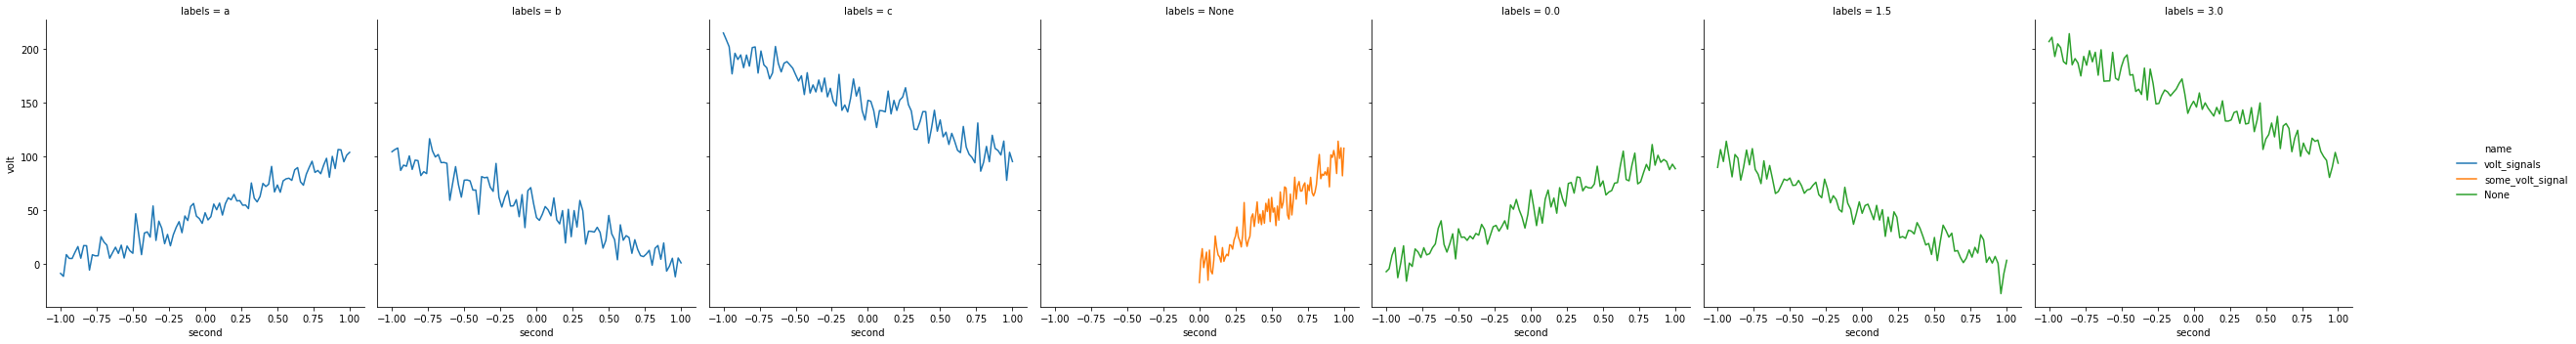

In [73]:
container.plot(hue='name', col='labels')

The container class also allows you to build a long-format dataframe containing all signals in the container:

In [74]:
df = container.to_longframe()
df.head()

,applied_window_,domain,domain_max,domain_min,domain_units,domain_units_dimensionality,labels,name,signal_max,signal_min,units,units_dimensionality,values
0,raw,-1.00,NaN,NaN,second,[time],a,volt_signals,NaN,NaN,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,-8.421724
1,raw,-1.00,NaN,NaN,second,[time],b,volt_signals,NaN,NaN,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,104.439843
2,raw,-1.00,NaN,NaN,second,[time],c,volt_signals,NaN,NaN,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,214.520538
3,raw,-0.98,NaN,NaN,second,[time],a,volt_signals,NaN,NaN,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,-11.121426
4,raw,-0.98,NaN,NaN,second,[time],b,volt_signals,NaN,NaN,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,106.406283


The `DomainSignalContainer` works similarly to the `SignalsContainer` class, except that it only accepts `DomainSignal` instances. 

## Special signal-type classes

There are various special type of signal-type classes that are subclassed from `Signal`, `Signals`, and `DomainSignal`. Similarly, there is one special case of a container class: `MeasuredSpectraContainer`.

* `Spectrum`: sublcass of `Signal` class that assumes that the domain is always in units of nanometer. The signal itself can be in any units. 
* `Spectra`: two-dimensional version of `Spectrum`; a subclass of `Signals`. 
* `IntensitySpectrum`: subclass of `Spectrum` that requires that the signal has the same unit dimensionality as spectral irradiance (`[mass] / [length] / [time] ** 3`) or photon flux (`[substance] / [length] ** 3 / [time]`).
* `IntensitySpectra`: subclass of `Spectra` and two-dimensional case of `IntensitySpectrum`
* `DomainSpectrum`: subclass of `DomainSignal` and enforces that the domain is in units of nanometer.
* `IntensityDomainSpectrum`: subclass of `DomainSpectrum` and same unit constraint as `IntensitySpectrum` and `IntensitySpectra`
* `MeasuredSpectrum`: subclass of `DomainSpectrum` with additional methods introduced in the `led_measurements.ipynb`. This object is meant to handle individual LED measurements obtained across a range of applied intensities. 
* `Sensitivity`: subclass of `Spectra` that is meant to contain a set of spectral sensitivities. This subclass also ensures that its significant domain boundaries are not removed when performing mathematical operations. 
* `CalibrationSpectrum`: subclass of `Spectrum` that contains a spectrophotometer calibration usually in units of `microjoule`. 
* `MeasuredSpectraContainer`: A container that contains multiple `MeasuredSpectrum` instances and maps the special methods of `MeasuredSpectrum` onto the container instance.

Please refer to the API for more details.

## Convenience functions to create signal-type classes

There are various convenience functions to create signal-type classes:

* create_gaussian_spectrum: Create a `Spectra` instance with each signal pertaining to a particular Gaussian-like spectral distribution.
* get_led_spectra_container: Create a `MeasuredSpectraContainer` instance from a range of measurements performed and the normalized LED spectral distributions.
* create_measured_spectrum: Create a `MeasuredSpectrum` instance from photon count measurements and given a `CalibrationSpectrum`.

Please refere to the API for more details.